## 1. Loading the Data

In [1]:
# Importing the necessary packages for doing the basic setup

import numpy as np # linear algebra
import pandas as pd # data preprocessing
pd.set_option('display.max_columns', None)
import warnings; warnings.filterwarnings('ignore')

# for visualization
%matplotlib inline  
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data = pd.concat([train, test], axis=0, ignore_index=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Data: ",data.shape)
print("Data: ",train.shape)
print("Data: ",test.shape)

Data:  (1309, 12)
Data:  (891, 12)
Data:  (418, 11)


## 2. Checking for Missing Values

In [5]:
# Nan values in total data

data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [6]:
# Nan values in train data

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Nan Values in test data

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# Filling the Nan values with np.nan

data.fillna(np.nan, inplace=True)

In [9]:
# Summarizing the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## 3. Feature Analysis and Engineering

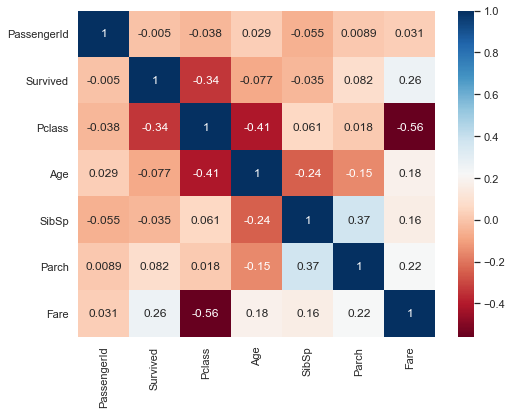

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='RdBu');

In [11]:
print("Shape of dataset with 3rd class passengers:",data[data['Pclass']==3].shape[0])
print("Number of 3rd class cabins with no data: ",data[data['Pclass']==3]['Cabin'].isnull().sum())
print("Total number of cabins with no data: ",data['Cabin'].isnull().sum())

Shape of dataset with 3rd class passengers: 709
Number of 3rd class cabins with no data:  693
Total number of cabins with no data:  1014


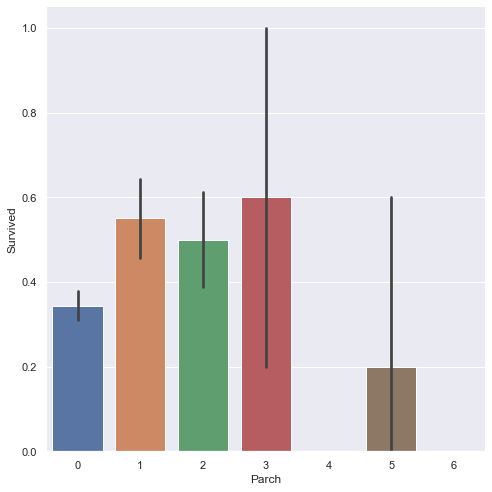

In [12]:
sns.factorplot('Parch', 'Survived', data=train, kind='bar', size=7);

If you have a parent or child of 1 or 2 numbers, you are more likely to survive. So in general, a medium sized family is more likely to survive than someone from a big family or someone who is single

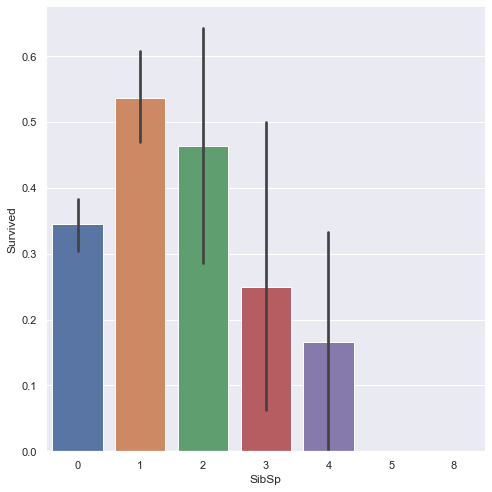

In [13]:
sns.factorplot('SibSp', 'Survived', data=train, kind='bar', size=7);

People with 0 siblings or spouse and 1 or 2 of these are most likely to survive. People with more than 2 siblings or a sibling and a spouse are less likely to survive

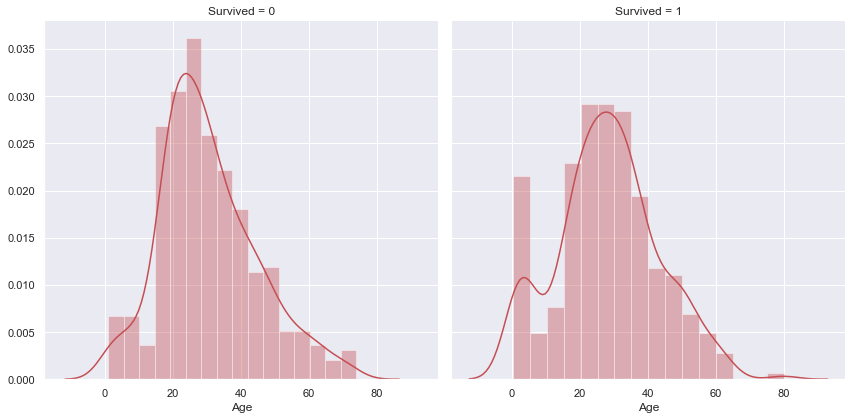

In [14]:
sns.FacetGrid(data=train, col='Survived', size=6).map(sns.distplot, 'Age', color='r');

In [15]:
data['Fare'].isnull().sum()

1

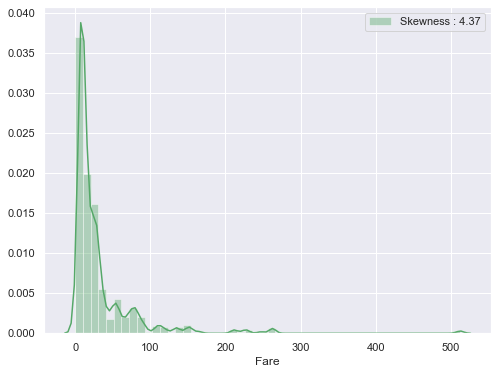

In [16]:
data['Fare'].fillna(data['Fare'].mean(), inplace=True)
plt.figure(figsize=(8,6))
sns.distplot(train['Fare'], color='g', label='Skewness : %.2f'%(data['Fare'].skew()))
plt.legend();

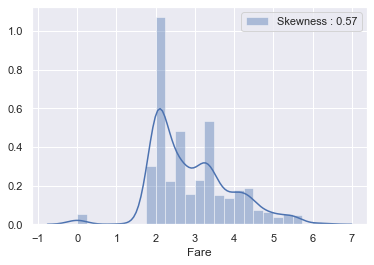

In [17]:
# The fare is highly positively skewed. Therefore applying log transformation

data['Fare'] = [np.log(i) if i > 0 else 0 for i in data['Fare']]
sns.distplot(data['Fare'], label="Skewness : %.2f"%(data['Fare'].skew()))
plt.legend();

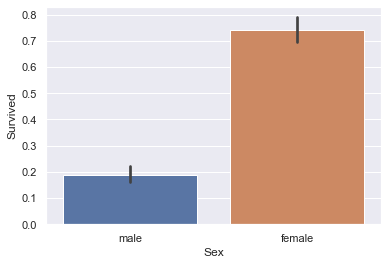

In [18]:
sns.barplot(data['Sex'], data['Survived']);

The chances of survival is nearly four times for women than women in this case

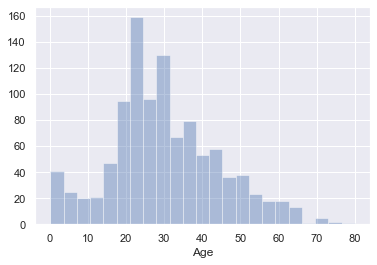

In [19]:
sns.distplot(data['Age'], kde=False);

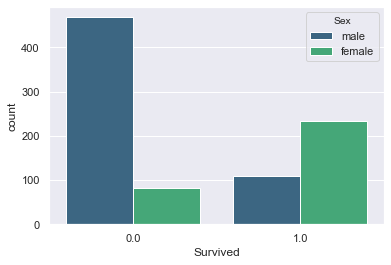

In [20]:
sns.countplot(data['Survived'], hue=data['Sex'], palette='viridis');

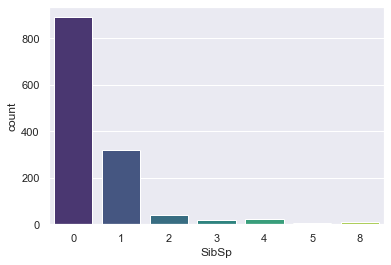

In [21]:
sns.countplot(data['SibSp'], palette='viridis');

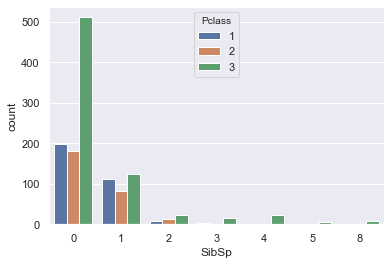

In [22]:
sns.countplot(data['SibSp'], hue=data['Pclass']);

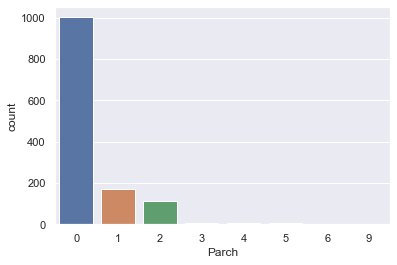

In [23]:
sns.countplot(data['Parch']);

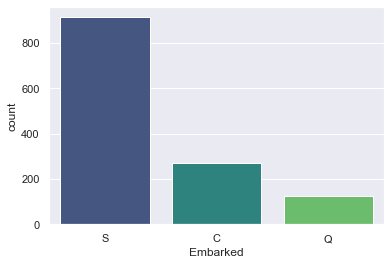

In [24]:
# Number of people boarded from different ports
# S -> Southampton
# Q -> Queenstown
# C -> Cherbourg

sns.countplot(data['Embarked'], palette='viridis');

## Title 

In [25]:
data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

We can see that the title is the second word instead of the first

In [26]:
title = [i.split(',')[1].split('.')[0].strip() for i in data['Name']]

data['Title'] = pd.DataFrame(title)

In [27]:
from collections import Counter
Counter(data['Title'])

Counter({'Mr': 757,
         'Mrs': 197,
         'Miss': 260,
         'Master': 61,
         'Don': 1,
         'Rev': 8,
         'Dr': 8,
         'Mme': 1,
         'Ms': 2,
         'Major': 2,
         'Lady': 1,
         'Sir': 1,
         'Mlle': 2,
         'Col': 4,
         'Capt': 1,
         'the Countess': 1,
         'Jonkheer': 1,
         'Dona': 1})

In [28]:
uncommon = ["Don", "Rev", "Dr", "Mme", "Major", "Lady", "Sir", "Col", "Capt", "the Countess", "Jonkheer", "Dona"]
data['Title'].replace(uncommon, 'uncommon', inplace=True)

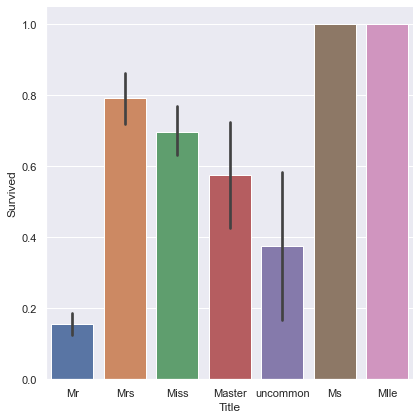

In [29]:
sns.factorplot('Title', 'Survived', data=data, kind='bar', size=6);

As can be seen above, having a title of 'Ms' or 'Mlle' guarantees that you survive the wreck.
Also, males with special title has an increased chance of survival than the ones who do not have special titles

In [30]:
data['Title'] = data['Title'].map({"Mr": 0, "Mrs": 1,
                                   "Miss": 1, "Master" : 2,
                                   "Ms": 3, "Mlle":3, "uncommon":4})

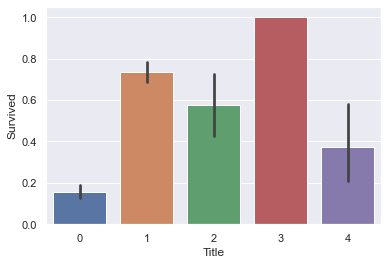

In [31]:
sns.barplot("Title", "Survived", data=data);

In [32]:
data['Title'] = data['Title'].astype('category')
data = pd.get_dummies(data, columns=['Title'], prefix='title')

In [33]:
# We do not need the 'Name' column anymore. Therefore we can drop it
data.drop('Name', axis=1, inplace=True)

## Cabin

In [34]:
print("Number of 3rd class passengers with no recorded cabin:", data[(pd.isnull(data['Cabin'])) & (data['Pclass'] == 3)].shape[0])
print("Number of 3rd class passengers with recorded cabin:",data[(pd.notnull(data['Cabin'])) & (data['Pclass'] == 3)].shape[0])
print("Number of 2nd class passengers with no recorded cabin:", data[(pd.isnull(data['Cabin'])) & (data['Pclass'] == 2)].shape[0])
print("Number of 2nd class passengers with recorded cabin:",data[(pd.notnull(data['Cabin'])) & (data['Pclass'] == 2)].shape[0])
print("Number of 1st class passengers with no recorded cabin:", data[(pd.isnull(data['Cabin'])) & (data['Pclass'] == 1)].shape[0])
print("Number of 1st class passengers with recorded cabin:",data[(pd.notnull(data['Cabin'])) & (data['Pclass'] == 1)].shape[0])

Number of 3rd class passengers with no recorded cabin: 693
Number of 3rd class passengers with recorded cabin: 16
Number of 2nd class passengers with no recorded cabin: 254
Number of 2nd class passengers with recorded cabin: 23
Number of 1st class passengers with no recorded cabin: 67
Number of 1st class passengers with recorded cabin: 256


### 3rd Class Passengers

In [35]:
data[(pd.notnull(data['Cabin'])) & (data['Pclass'] == 3)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_0,title_1,title_2,title_3,title_4
10,11,1.0,3,female,4.0,1,1,PP 9549,2.815409,G6,S,0,1,0,0,0
75,76,0.0,3,male,25.0,0,0,348123,2.034706,F G73,S,1,0,0,0,0
128,129,1.0,3,female,NaN,1,1,2668,3.107198,F E69,C,0,1,0,0,0
205,206,0.0,3,female,2.0,0,1,347054,2.347797,G6,S,0,1,0,0,0
251,252,0.0,3,female,29.0,1,1,347054,2.347797,G6,S,0,1,0,0,0
394,395,1.0,3,female,24.0,0,2,PP 9549,2.815409,G6,S,0,1,0,0,0
429,430,1.0,3,male,32.0,0,0,SOTON/O.Q. 392078,2.085672,E10,S,1,0,0,0,0
699,700,0.0,3,male,42.0,0,0,348121,2.034706,F G63,S,1,0,0,0,0
715,716,0.0,3,male,19.0,0,0,348124,2.034706,F G73,S,1,0,0,0,0
751,752,1.0,3,male,6.0,0,1,392096,2.523727,E121,S,0,0,1,0,0


In [36]:
data[(pd.isnull(data['Cabin'])) & (data['Pclass'] == 3)].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_0,title_1,title_2,title_3,title_4
0,1,0.0,3,male,22.0,1,0,A/5 21171,1.981001,NaN,S,1,0,0,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,0,1,0,0,0
4,5,0.0,3,male,35.0,0,0,373450,2.085672,NaN,S,1,0,0,0,0
5,6,0.0,3,male,NaN,0,0,330877,2.135148,NaN,Q,1,0,0,0,0
7,8,0.0,3,male,2.0,3,1,349909,3.048088,NaN,S,0,0,1,0,0


### 2nd Class Passengers

In [37]:
data[(pd.isnull(data['Cabin'])) & (data['Pclass'] == 2)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_0,title_1,title_2,title_3,title_4
9,10,1.0,2,female,14.0,1,0,237736,3.403555,NaN,C,0,1,0,0,0
15,16,1.0,2,female,55.0,0,0,248706,2.772589,NaN,S,0,1,0,0,0
17,18,1.0,2,male,NaN,0,0,244373,2.564949,NaN,S,1,0,0,0,0
20,21,0.0,2,male,35.0,0,0,239865,3.258097,NaN,S,1,0,0,0,0
33,34,0.0,2,male,66.0,0,0,C.A. 24579,2.351375,NaN,S,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,1277,NaN,2,female,24.0,1,2,220845,4.174387,NaN,S,0,1,0,0,0
1278,1279,NaN,2,male,57.0,0,0,244346,2.564949,NaN,S,1,0,0,0,0
1284,1285,NaN,2,male,47.0,0,0,C.A. 30769,2.351375,NaN,S,1,0,0,0,0
1292,1293,NaN,2,male,38.0,1,0,28664,3.044522,NaN,S,1,0,0,0,0


In [38]:
data[(pd.notnull(data['Cabin'])) & (data['Pclass'] == 2)].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_0,title_1,title_2,title_3,title_4
21,22,1.0,2,male,34.0,0,0,248698,2.564949,D56,S,1,0,0,0,0
66,67,1.0,2,female,29.0,0,0,C.A. 29395,2.351375,F33,S,0,1,0,0,0
123,124,1.0,2,female,32.5,0,0,27267,2.564949,E101,S,0,1,0,0,0
148,149,0.0,2,male,36.5,0,2,230080,3.258097,F2,S,1,0,0,0,0
183,184,1.0,2,male,1.0,2,1,230136,3.663562,F4,S,0,0,1,0,0


### 1st Class Passengers

In [39]:
print(data[(pd.isnull(data['Cabin'])) & (data['Pclass'] == 1)].shape[0])
data[(pd.isnull(data['Cabin'])) & (data['Pclass'] == 1)].head()

67


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_0,title_1,title_2,title_3,title_4
30,31,0.0,1,male,40.0,0,0,PC 17601,3.322183,NaN,C,0,0,0,0,1
34,35,0.0,1,male,28.0,1,0,PC 17604,4.408800,NaN,C,1,0,0,0,0
35,36,0.0,1,male,42.0,1,0,113789,3.951244,NaN,S,1,0,0,0,0
64,65,0.0,1,male,NaN,0,0,PC 17605,3.322183,NaN,C,1,0,0,0,0
83,84,0.0,1,male,28.0,0,0,113059,3.852273,NaN,S,1,0,0,0,0


In [40]:
data[(pd.notnull(data['Cabin'])) & (data['Pclass'] == 1)].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_0,title_1,title_2,title_3,title_4
1,2,1.0,1,female,38.0,1,0,PC 17599,4.266662,C85,C,0,1,0,0,0
3,4,1.0,1,female,35.0,1,0,113803,3.972177,C123,S,0,1,0,0,0
6,7,0.0,1,male,54.0,0,0,17463,3.948596,E46,S,1,0,0,0,0
11,12,1.0,1,female,58.0,0,0,113783,3.279030,C103,S,0,1,0,0,0
23,24,1.0,1,male,28.0,0,0,113788,3.569533,A6,S,1,0,0,0,0


In [41]:
# Replacing the Cabin records with the first letter of the last word

cabin = [i.split(" ")[-1][0] if type(i) != float else np.nan for i in data['Cabin']]
data['Cabin'] = cabin
Counter(data['Cabin'])

Counter({nan: 1014,
         'C': 94,
         'E': 44,
         'G': 9,
         'D': 46,
         'A': 22,
         'B': 65,
         'F': 14,
         'T': 1})

In [42]:
print("Mode of initials of cabin of 1st class",data[data['Pclass'] == 1]['Cabin'].mode()[0])
print("Mode of initials of cabin of 2nd class",data[data['Pclass'] == 2]['Cabin'].mode()[0])
print("Mode of initials of cabin of 3rd class",data[data['Pclass'] == 3]['Cabin'].mode()[0])

Mode of initials of cabin of 1st class C
Mode of initials of cabin of 2nd class F
Mode of initials of cabin of 3rd class G


In [43]:
# Function to fill null values in 'Cabin' Feature

def fill_cabin(cols):
    cabin = cols[0]
    pclass = cols[1]
    if pd.isnull(cabin):
        if pclass == 1:
            return 'C'
        elif pclass == 2:
            return 'F'
        else:
            return 'G'
    else:
        return cabin

In [44]:
data['Cabin'] = data[['Cabin', 'Pclass']].apply(fill_cabin, axis=1)
Counter(data['Cabin'])

Counter({'G': 702,
         'C': 161,
         'E': 44,
         'F': 268,
         'D': 46,
         'A': 22,
         'B': 65,
         'T': 1})

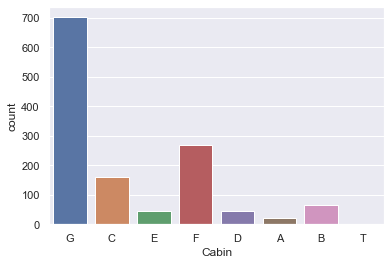

In [45]:
sns.countplot(data['Cabin']);

In [46]:
data[data['Cabin'] == 'T']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_0,title_1,title_2,title_3,title_4
339,340,0.0,1,male,45.0,0,0,113784,3.569533,T,S,1,0,0,0,0


In [47]:
# This is an outlier. Therefore, we can eliminate this entry

ind = data[data['Cabin'] == 'T'].index
data.drop(index=ind, inplace=True, axis=0)

In [48]:
data['Cabin'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G'],[1, 2, 3, 4, 5, 6, 7], inplace=True)
data['Cabin'] = data['Cabin'].astype('category')
data = pd.get_dummies(data, columns=['Cabin'], prefix="cab")

## Age

In [49]:
# The first class passengers are well established persons therefore, they could have a higher average age than the 2nd and the 3rd class passengers

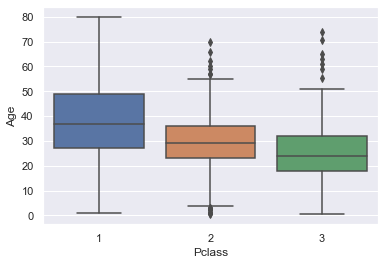

In [50]:
sns.boxplot('Pclass','Age', data=train);

In [51]:
# Function for imputing age

def impute_age(col):
    age = col[0]
    pclass = col[1]
    if pd.isnull(age):
        
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [52]:
data['Age'] = data[['Age','Pclass']].apply(impute_age, axis=1)

## Ticket

In [53]:
# We are replacing the values in ticket with only the strings stripped from the data
# If there are only numbers, 'ADDED' will replace the value

ticket = []

for i in list(data['Ticket']):
    if not i.isdigit():
        t = i.replace("/","").replace(".","").strip().split(" ")[0]
    else:
        t ='NUM' 
    ticket.append(t)

TICKETS = []
for t in ticket:
    if len(t) > 3:
        t = t[:4]
        TICKETS.append(t)
    else:
        TICKETS.append(t)
        
        
    
data['Ticket'] = TICKETS

In [54]:
Counter(data['Ticket'])

Counter({'A5': 28,
         'PC': 92,
         'STON': 22,
         'NUM': 956,
         'PP': 4,
         'CA': 68,
         'SCPa': 5,
         'SCA4': 2,
         'A4': 10,
         'SP': 1,
         'SOC': 8,
         'WC': 15,
         'SOTO': 27,
         'WEP': 4,
         'C': 8,
         'SCPA': 14,
         'SOP': 1,
         'Fa': 1,
         'LINE': 4,
         'FCC': 9,
         'SWPP': 2,
         'SCOW': 1,
         'PPP': 2,
         'SC': 2,
         'SCAH': 5,
         'AS': 1,
         'SOPP': 7,
         'FC': 3,
         'CASO': 1,
         'SCA3': 1,
         'AQ4': 1,
         'A': 1,
         'LP': 1,
         'AQ3': 1})

In [55]:
data = pd.get_dummies(data, columns=['Ticket'], prefix="ticket")

## Embarked

In [56]:
# Checking the NaN values for "Embarked" feature

data[pd.isnull(data['Embarked'])]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title_0,title_1,title_2,title_3,title_4,cab_1,cab_2,cab_3,cab_4,cab_5,cab_6,cab_7,ticket_A,ticket_A4,ticket_A5,ticket_AQ3,ticket_AQ4,ticket_AS,ticket_C,ticket_CA,ticket_CASO,ticket_FC,ticket_FCC,ticket_Fa,ticket_LINE,ticket_LP,ticket_NUM,ticket_PC,ticket_PP,ticket_PPP,ticket_SC,ticket_SCA3,ticket_SCA4,ticket_SCAH,ticket_SCOW,ticket_SCPA,ticket_SCPa,ticket_SOC,ticket_SOP,ticket_SOPP,ticket_SOTO,ticket_SP,ticket_STON,ticket_SWPP,ticket_WC,ticket_WEP
61,62,1.0,1,female,38.0,0,0,4.382027,NaN,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
829,830,1.0,1,female,62.0,0,0,4.382027,NaN,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
# We shall check which entry is the most common for similar records

data[(data['Sex'] == 'female') & (data['Pclass'] == 1) & (data['Survived'] == 1)]['Embarked'].mode()

0    S
dtype: object

In [58]:
# Filling NaN value with 'S' (Southampton) for 'Embarked' column

data['Embarked'].fillna('S', inplace=True)

In [59]:
Counter(data['Embarked'])

Counter({'S': 915, 'C': 270, 'Q': 123})

In [60]:
data['Embarked'].replace(['S','C','Q'], [1,2,3], inplace=True)
data['Embarked'] = data['Embarked'].astype('category')
data = pd.get_dummies(data, columns=['Embarked'], prefix="Emb")

## Pclass

In [61]:
data['Pclass'] = data['Pclass'].astype('category')
data = pd.get_dummies(data, columns=['Pclass'], prefix='class')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 59 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1308 non-null   int64  
 1   Survived     890 non-null    float64
 2   Sex          1308 non-null   object 
 3   Age          1308 non-null   float64
 4   SibSp        1308 non-null   int64  
 5   Parch        1308 non-null   int64  
 6   Fare         1308 non-null   float64
 7   title_0      1308 non-null   uint8  
 8   title_1      1308 non-null   uint8  
 9   title_2      1308 non-null   uint8  
 10  title_3      1308 non-null   uint8  
 11  title_4      1308 non-null   uint8  
 12  cab_1        1308 non-null   uint8  
 13  cab_2        1308 non-null   uint8  
 14  cab_3        1308 non-null   uint8  
 15  cab_4        1308 non-null   uint8  
 16  cab_5        1308 non-null   uint8  
 17  cab_6        1308 non-null   uint8  
 18  cab_7        1308 non-null   uint8  
 19  ticket

## Family Size

In [63]:
data['family_size'] = data['SibSp'] + data['Parch'] + 1

In [64]:
def fam_size_calc(size):
    """Fucntions that returns a number based on the total number of persons in a family"""
    
    if size == 1:
        return 0    
    elif 1 < size <= 3:
        return 1
    elif 3 < size <= 5:
        return 2
    else:
        return 3
    
# Applying the function
data['family_size'] = data['family_size'].apply(fam_size_calc)

In [65]:
Counter(data['family_size'])

Counter({1: 394, 0: 789, 2: 65, 3: 60})

In [66]:
data = pd.get_dummies(data, columns=['family_size'], prefix="fsize")

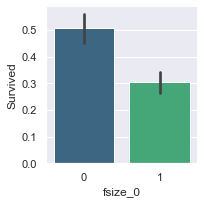

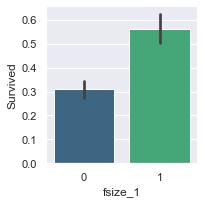

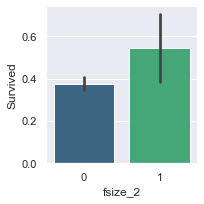

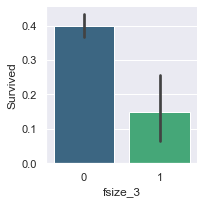

In [67]:
sns.factorplot('fsize_0', 'Survived', data=data, kind='bar', size=3, palette='viridis');
sns.factorplot('fsize_1', 'Survived', data=data, kind='bar', size=3, palette='viridis');
sns.factorplot('fsize_2', 'Survived', data=data, kind='bar', size=3, palette='viridis');
sns.factorplot('fsize_3', 'Survived', data=data, kind='bar', size=3, palette='viridis');

## Sex

In [68]:
data = pd.get_dummies(data, columns=['Sex'])

### Dropping unwanted columns

In [69]:
data.drop('PassengerId', inplace=True, axis=1)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 63 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     890 non-null    float64
 1   Age          1308 non-null   float64
 2   SibSp        1308 non-null   int64  
 3   Parch        1308 non-null   int64  
 4   Fare         1308 non-null   float64
 5   title_0      1308 non-null   uint8  
 6   title_1      1308 non-null   uint8  
 7   title_2      1308 non-null   uint8  
 8   title_3      1308 non-null   uint8  
 9   title_4      1308 non-null   uint8  
 10  cab_1        1308 non-null   uint8  
 11  cab_2        1308 non-null   uint8  
 12  cab_3        1308 non-null   uint8  
 13  cab_4        1308 non-null   uint8  
 14  cab_5        1308 non-null   uint8  
 15  cab_6        1308 non-null   uint8  
 16  cab_7        1308 non-null   uint8  
 17  ticket_A     1308 non-null   uint8  
 18  ticket_A4    1308 non-null   uint8  
 19  ticket

In [71]:
train = data[(pd.notnull(data['Survived']))]

test = data[(pd.isnull(data['Survived']))]

In [72]:
test.dropna(axis=1, inplace=True)
test.shape

(418, 62)

In [73]:
# Splitting into Features and Label

y = train['Survived']
X = train.drop('Survived', axis=1)

**We are done with the data preprocessing**

# Modelling

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, learning_curve, cross_val_score

In [75]:
kfold = StratifiedKFold(n_splits=15)

In [76]:
r_state=100

log_reg = LogisticRegression(random_state=r_state)
rfc = RandomForestClassifier(random_state=r_state)
dec_tree = DecisionTreeClassifier(random_state=r_state)
ada = AdaBoostClassifier(random_state=r_state)
grad_b = GradientBoostingClassifier(random_state=r_state)
xgb = XGBClassifier(random_state=r_state)
mlp = MLPClassifier(random_state=r_state)
svc = SVC(random_state=r_state)
knn = KNeighborsClassifier()

algorithms = [log_reg, rfc, dec_tree, ada, grad_b, xgb, mlp, svc, knn]

In [77]:
cv_res =[]

for algo in algorithms:
    cv_res.append(cross_val_score(algo, X, y, cv=kfold, scoring='accuracy', n_jobs=4))
    
cv_mean, cv_std = [], []

for result in cv_res:
    cv_mean.append(result.mean())
    cv_std.append(result.std())
    
algorithm =["Logistic Regression", "Random Forest", "Decision Tree", "AdaBoost", "Gradient Boost", "XGBoost", "MLP", "SVM", "Nearest Neighbor"]

cv_result = pd.DataFrame({"Algorithms":algorithm, "Mean":cv_mean, "Standard Deviation":cv_std})

In [78]:
cv_result = cv_result.sort_values(by='Mean', ascending=False)

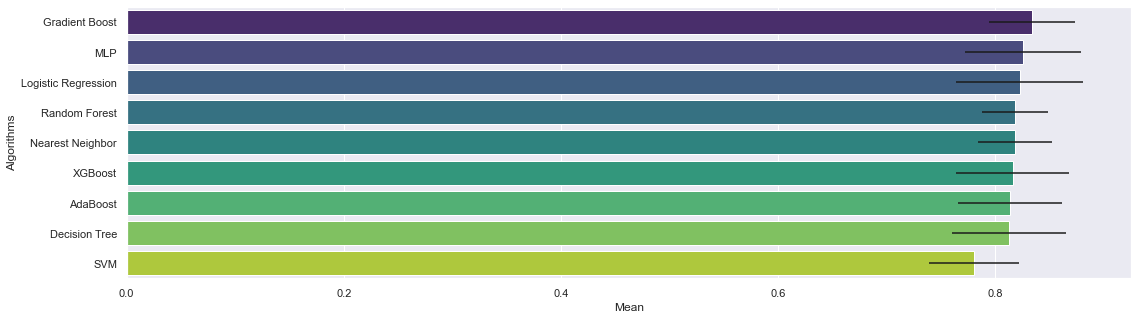

In [79]:
plt.figure(figsize=(18,5))
sns.barplot( "Mean", "Algorithms",  data=cv_result, palette='viridis', orient='h',**{'xerr':cv_std});

We will take Gradient Boost, Random Forest, MLP, Logistic Regression, SVM and Nearest Neighbor for short-listing for ensembling

### *Hyperparameter Tuning*

#### 1. Gradient Boosting Classifier

In [80]:
grad_b = GradientBoostingClassifier()

grad_b_params = {"loss":['deviance','exponential'],
                 "learning_rate":[0.001, 0.01, 0.1],
                 "n_estimators":[100, 200, 300, 1000],
                 "subsample":[0.75, 1.0],
                 "min_samples_split":[2, 3],    
                 "max_depth":[3, 5]}

grid_GradBoost = GridSearchCV(grad_b, param_grid=grad_b_params, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=2)

grid_GradBoost.fit(X, y)

grid_GradBoost_est = grid_GradBoost.best_estimator_

grid_GradBoost_score = grid_GradBoost.best_score_

Fitting 15 folds for each of 192 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 20.6min finished


In [81]:
print(grid_GradBoost_score)

0.8485310734463276


 #### 2. Random Forest Classifier

In [82]:
rfc = RandomForestClassifier()

rfc_params= {'n_estimators':[100, 200, 300],
             'criterion':['gini','entropy'],
             'max_depth':[5,7],                             
             'min_samples_split':[2,3],
             'min_samples_leaf':[2,3],
             'max_features':['auto',"sqrt"]}

grid_rfc = GridSearchCV(rfc, param_grid=rfc_params, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1)

grid_rfc.fit(X, y)

grid_rfc_est = grid_rfc.best_estimator_

grid_rfc_score = grid_rfc.best_score_


Fitting 15 folds for each of 96 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  4.6min finished


In [83]:
print(grid_rfc_score)

0.8327118644067796


#### 3. MLP Classifier

In [84]:
mlp  = MLPClassifier()

mlp_params = {"hidden_layer_sizes":[(100,),(100,100), (100,100,100)],
              "activation":['relu','logistic'],
              "alpha":[0.0001, 0.001],    
              "learning_rate":['constant','adaptive'],
              "learning_rate_init":[0.0001],
              "early_stopping":[True]}

grid_mlp = GridSearchCV(mlp, param_grid=mlp_params, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1)

grid_mlp.fit(X, y)

grid_mlp_est = grid_rfc.best_estimator_

grid_mlp_score = grid_rfc.best_score_


Fitting 15 folds for each of 24 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   54.7s finished


In [85]:
print(grid_mlp_score)

0.8327118644067796


#### 4. Logistic Regression

In [86]:
log_reg = LogisticRegression()

logreg_params ={"penalty":['l1','l2'],    
                "tol":[0.0001,0.001],
                "C":[0.1, 1.0,10, 100],
                "fit_intercept":[True, False],
                "solver":['liblinear','lbfgs']}

grid_logreg = GridSearchCV(log_reg, param_grid=logreg_params, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1)

grid_logreg.fit(X, y)

grid_logreg_est = grid_logreg.best_estimator_

grid_logreg_score = grid_logreg.best_score_


Fitting 15 folds for each of 64 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    8.4s finished


In [87]:
print(grid_logreg_score)

0.8258757062146891


#### 5. Support Vector Machine

In [88]:
svc = SVC()

svc_params={"C":[0.1, 1.0, 10, 100,],
            "degree":[2,3,4],
            "gamma":['scale',1, 3],
            "probability":[True]}

grid_svc = GridSearchCV(svc, param_grid=svc_params, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1)

grid_svc.fit(X, y)

grid_svc_est = grid_svc.best_estimator_

grid_svc_score = grid_svc.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.3min finished


In [89]:
print(grid_svc_score)

0.8259322033898306


#### 6. K-Neighbours Classifier

In [90]:
knn = KNeighborsClassifier()

knn_params = {"n_neighbors":[3,4,5,6],
              "weights":['uniform', 'distance'],
              "algorithm":['auto','kd_tree'],
              "leaf_size":[25, 30, 35 ]}


grid_knn = GridSearchCV(knn, param_grid=knn_params, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1)

grid_knn.fit(X, y)

grid_knn_est = grid_knn.best_estimator_

grid_knn_score = grid_knn.best_score_


Fitting 15 folds for each of 48 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 713 out of 720 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    6.3s finished


In [91]:
print(grid_knn_score)

0.8192278719397362


In [92]:
def plot_curve(model, title, X, y, cv=None, train_size=np.linspace(0.1, 1.0, 5)):
    """Function for plotting the training and cross-validation curves for visual examination of the training"""
    plt.figure(figsize=(7,5))
    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("Score")
    train_sizes, train_score, test_score = learning_curve(model,X, y,
                                                         cv=cv, n_jobs=-1, train_sizes=train_size)
    train_scores_mean = np.mean(train_score, axis=1)
    train_scores_std = np.std(train_score, axis=1)
    test_scores_mean = np.mean(test_score, axis=1)
    test_scores_std = np.std(test_score, axis=1)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color='b')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color='r')
    plt.plot(train_sizes, train_scores_mean, 'b-o', label='Training' )
    plt.plot(train_sizes, test_scores_mean, 'r-o', label='Cross-validation')
    plt.legend(loc='best')
    
    return plt

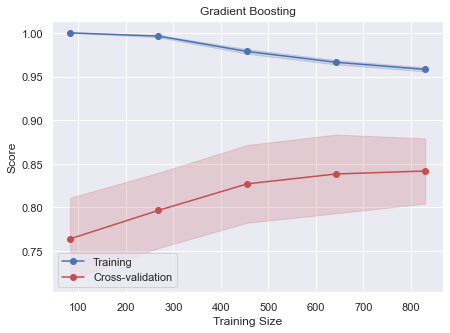

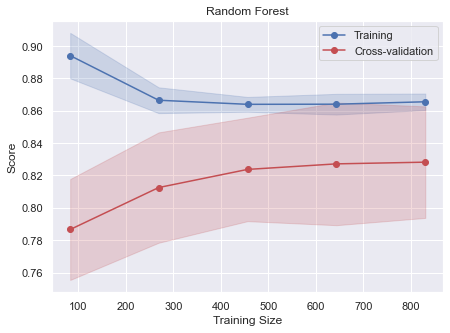

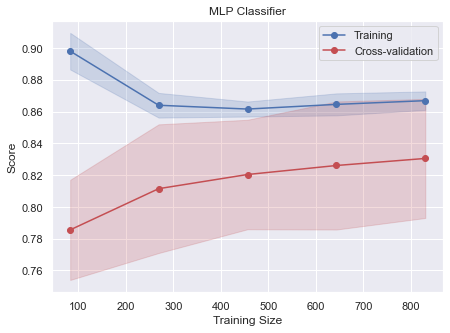

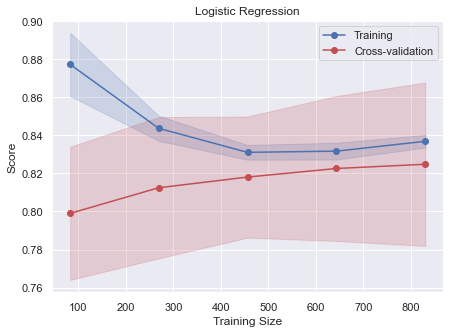

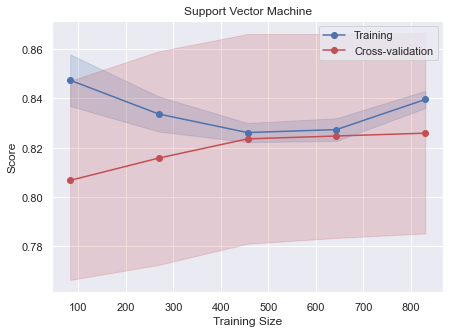

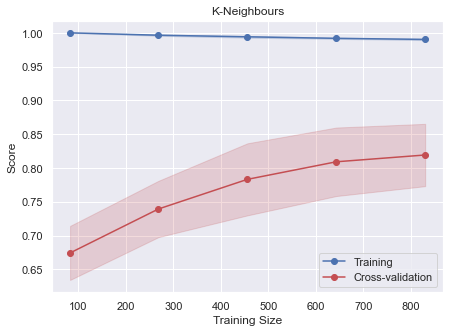

In [93]:
plot_curve(grid_GradBoost_est, "Gradient Boosting", X, y, cv=kfold );
plot_curve(grid_rfc_est, "Random Forest", X, y, cv=kfold );
plot_curve(grid_mlp_est, "MLP Classifier", X, y, cv=kfold );
plot_curve(grid_logreg_est, "Logistic Regression", X, y, cv=kfold );
plot_curve(grid_svc_est, "Support Vector Machine", X, y, cv=kfold );
plot_curve(grid_knn_est, "K-Neighbours", X, y, cv=kfold );

Out of all the 5 algorithms, K-Neighbors seems to be overfit and Logistic Regression and Support Vector Machines seemsto underfit while the rest of the models seem to do fine.

#### Prediction

In [94]:
predict_gradBoost = pd.Series(grid_GradBoost_est.predict(test), name="Grad_B")
predict_rfc = pd.Series(grid_rfc_est.predict(test), name="RFC")
predict_mlp = pd.Series(grid_mlp_est.predict(test), name="MLP")
predict_logreg = pd.Series(grid_logreg_est.predict(test), name="LogReg")
predict_svc = pd.Series(grid_svc_est.predict(test), name="SVC")
predict_knn = pd.Series(grid_knn_est.predict(test), name="KNN")

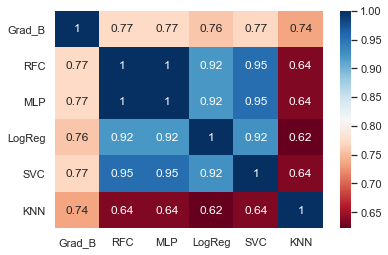

In [95]:
predicted_combined = pd.concat([predict_gradBoost,
                                predict_rfc, 
                                predict_mlp, 
                                predict_logreg,
                                predict_svc,
                                predict_knn], axis=1)

sns.heatmap(predicted_combined.corr(), annot=True, cmap='RdBu');

## Ensemble

In [96]:
voting = VotingClassifier([("Grad_Boost", grid_GradBoost_est),
                           ("LogReg", grid_logreg_est),
                           ("KNN", grid_knn_est)],
                           voting='soft')

voting.fit(X, y)

VotingClassifier(estimators=[('Grad_Boost',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         loss='exponential',
                                                         max_depth=5,
                                                         n_estimators=1000,
                                                         subsample=0.75)),
                             ('LogReg',
                              LogisticRegression(fit_intercept=False)),
                             ('KNN',
                              KNeighborsClassifier(leaf_size=25, n_neighbors=6,
                                                   weights='distance'))],
                 voting='soft')

## Prediction 

In [98]:
final_pred = pd.Series(voting.predict(test), name="Survived")


test_ = pd.read_csv("test.csv")
submission = pd.concat([test_['PassengerId'], final_pred.astype(int)], axis=1)

In [99]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [100]:
submission.to_csv("Ensemble_voting.csv", index=False)